In [1]:
import pandas as pd
import numpy as np
import keras as k
from keras.models import Sequential
from keras.layers import  Conv2D, MaxPool2D, Dropout, Dense, Flatten
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import SGD
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import tensorflow as tf

import os

Using TensorFlow backend.


In [2]:
zip_dir = k.utils.get_file('cats_and_dogs_filterted.zip', origin='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip', extract=True)
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

68608000/68606236 [==============================] - 2s 0us/step


In [3]:
batch_size = 150
image_size = 200

train_image_generator = k.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                                 rotation_range=40,
                                                                 width_shift_range=0.2,
                                                                 height_shift_range=0.2,
                                                                 shear_range=0.2,
                                                                 zoom_range=0.2,
                                                                 horizontal_flip=True,
                                                                 fill_mode = 'nearest')

validation_image_generator = k.preprocessing.image.ImageDataGenerator(rescale = 1./255)

train_data_generator = train_image_generator.flow_from_directory(batch_size = batch_size,
                                                                      directory = train_dir,
                                                                      shuffle = True, 
                                                                      target_size = [image_size, image_size],
                                                                      class_mode = 'binary')

validation_data_generator = validation_image_generator.flow_from_directory(batch_size = batch_size,
                                                                      directory = validation_dir,
                                                                      shuffle = True, 
                                                                      target_size = [image_size, image_size],
                                                                      class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
def load_image(path, size = [image_size,image_size]):
  img = load_img(path, target_size = size)
  return img_to_array(img).reshape(1,size[0],size[1],3)

In [8]:
selfmade_model = Sequential()
selfmade_model.add(Conv2D(32, (3,3), activation= 'relu', input_shape = (image_size, image_size, 3)))
selfmade_model.add(MaxPool2D(2,2))
selfmade_model.add(Conv2D(64, (3,3), activation= 'relu'))
selfmade_model.add(MaxPool2D(2,2))
selfmade_model.add(Conv2D(128, (3,3), activation= 'relu'))
selfmade_model.add(MaxPool2D(2,2))
selfmade_model.add(Conv2D(128, (3,3), activation= 'relu'))
selfmade_model.add(MaxPool2D(2,2))
selfmade_model.add(Dropout(0.5))
selfmade_model.add(Flatten())
selfmade_model.add(Dense(512, activation = 'relu'))
selfmade_model.add(Dense(2, activation = 'softmax'))

selfmade_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
selfmade_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 21, 21, 128)      

In [9]:
epochs = 10
history = selfmade_model.fit_generator(train_data_generator,
                              epochs = epochs,
                              steps_per_epoch= 20,
                              validation_data = validation_data_generator, validation_steps = 10)

Epoch 1/10
20/20 [==============================] - 40s 2s/step - loss: 0.7618 - acc: 0.5090 - val_loss: 0.6765 - val_acc: 0.5662
Epoch 2/10
20/20 [==============================] - 39s 2s/step - loss: 0.6775 - acc: 0.5548 - val_loss: 0.7005 - val_acc: 0.5572
Epoch 3/10
20/20 [==============================] - 37s 2s/step - loss: 0.6633 - acc: 0.5704 - val_loss: 0.7177 - val_acc: 0.5657
Epoch 4/10
20/20 [==============================] - 37s 2s/step - loss: 0.6539 - acc: 0.6046 - val_loss: 0.6335 - val_acc: 0.6359
Epoch 5/10
20/20 [==============================] - 39s 2s/step - loss: 0.6367 - acc: 0.6137 - val_loss: 0.6212 - val_acc: 0.6271
Epoch 6/10
20/20 [==============================] - 36s 2s/step - loss: 0.6552 - acc: 0.6042 - val_loss: 0.6644 - val_acc: 0.5848
Epoch 7/10
20/20 [==============================] - 39s 2s/step - loss: 0.6524 - acc: 0.6141 - val_loss: 0.6258 - val_acc: 0.6657
Epoch 8/10
20/20 [==============================] - 36s 2s/step - loss: 0.6285 - acc: 0.64

## Let's try fine tuning


In [0]:

base_model = VGG16(weights='imagenet', include_top=False, input_shape = (250,250,3))
for layer in base_model.layers:
  layer.trainable = False
flat1 = Flatten()(base_model.layers[-1].output)
output = Dense(2, activtrain_image_generator = k.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                                 rotation_range=40,
                                                                 width_shift_range=0.2,
                                                                 height_shift_range=0.2,
                                                                 shear_range=0.2,
                                                                 zoom_range=0.2,
                                                                 horizontal_flip=True,
                                                                 fill_mode = 'nearest')

validation_image_generator = k.preprocessing.image.ImageDataGenerator(rescale = 1./255)
ation = 'softmax')(flat1)

model = Model(inputs = base_model.inputs, outputs = output)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

epochs = 6
history = model.fit_generator(train_data_generator,
                              epochs = epochs,
                              steps_per_epoch= 100,
                              validation_data = validation_data_generator, validation_steps = 50)

Epoch 1/6
100/100 [==============================] - 262s 3s/step - loss: 0.4796 - acc: 0.8062 - val_loss: 0.1972 - val_acc: 0.9288
Epoch 2/6
100/100 [==============================] - 237s 2s/step - loss: 0.2218 - acc: 0.9091 - val_loss: 0.1760 - val_acc: 0.9403
Epoch 3/6
100/100 [==============================] - 238s 2s/step - loss: 0.1962 - acc: 0.9186 - val_loss: 0.1923 - val_acc: 0.9262
Epoch 4/6
100/100 [==============================] - 236s 2s/step - loss: 0.1771 - acc: 0.9281 - val_loss: 0.1643 - val_acc: 0.9441
Epoch 5/6
100/100 [==============================] - 235s 2s/step - loss: 0.1601 - acc: 0.9375 - val_loss: 0.1573 - val_acc: 0.9476
Epoch 6/6
100/100 [==============================] - 232s 2s/step - loss: 0.1490 - acc: 0.9421 - val_loss: 0.2149 - val_acc: 0.9115


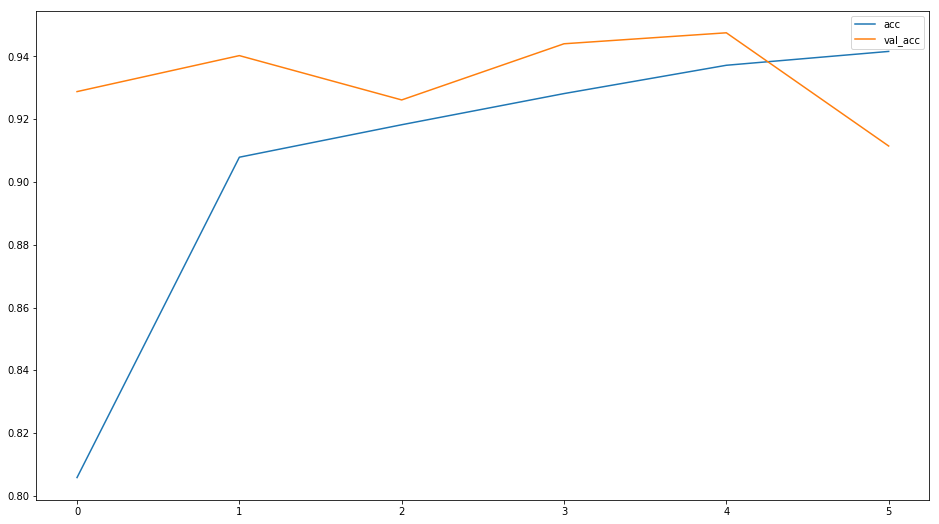

In [0]:
plt.figure(figsize=(16,9))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

In [0]:
#save model with weights
model.save('CatDog.h5')

cat:1.0 
dog:0.0


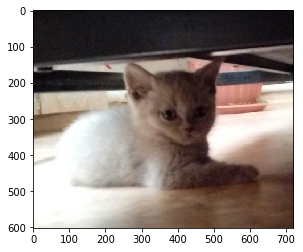

In [0]:
def load_image(path, size = [200,200]):
  img = load_img(path, target_size = size)
  return img_to_array(img).reshape(1,size[0],size[1],3)

catdog_classifier = load_model('CatDog.h5')
answer = catdog_classifier.predict(load_image('example.jpg'))
plt.imshow(load_img('example.jpg', [250,250]))
print(f"cat:{answer[0][0]} \ndog:{answer[0][1]}")

## increase accuracy by retraining few layers in vgg

In [0]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape = (image_size,image_size,3))
for layer in base_model.layers:
    if layer.name == 'block5_conv1':
        layer.trainable = True
    else:
        layer.trainable = False
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer = k.optimizers.RMSprop(lr=1e-5),
              loss = 'binary_crossentropy',
              metrics = ['accuracy']);

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten_20 (Flatten)         (None, 18432)             0         
_________________________________________________________________
dense_39 (Dense)             (None, 256)               4718848   
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 257       
Total params: 19,433,793
Trainable params: 7,078,913
Non-trainable params: 12,354,880
_________________________________________________________________


In [0]:
epochs = 8
history = model.fit_generator(train_data_generator,
                              epochs = epochs,
                              steps_per_epoch= 100,
                              validation_data = validation_data_generator,
                              validation_steps = 50)

Epoch 1/8
100/100 [==============================] - 179s 2s/step - loss: 0.4720 - acc: 0.7807 - val_loss: 0.2585 - val_acc: 0.8982
Epoch 2/8
100/100 [==============================] - 165s 2s/step - loss: 0.2886 - acc: 0.8835 - val_loss: 0.1890 - val_acc: 0.9262
Epoch 3/8
100/100 [==============================] - 168s 2s/step - loss: 0.2320 - acc: 0.9088 - val_loss: 0.1464 - val_acc: 0.9524
Epoch 4/8
100/100 [==============================] - 168s 2s/step - loss: 0.1912 - acc: 0.9241 - val_loss: 0.1524 - val_acc: 0.9441
Epoch 5/8
100/100 [==============================] - 170s 2s/step - loss: 0.1680 - acc: 0.9351 - val_loss: 0.1227 - val_acc: 0.9586
Epoch 6/8
100/100 [==============================] - 172s 2s/step - loss: 0.1559 - acc: 0.9383 - val_loss: 0.1667 - val_acc: 0.9277
Epoch 7/8
100/100 [==============================] - 173s 2s/step - loss: 0.1377 - acc: 0.9457 - val_loss: 0.1102 - val_acc: 0.9608
Epoch 8/8
100/100 [==============================] - 165s 2s/step - loss: 0.

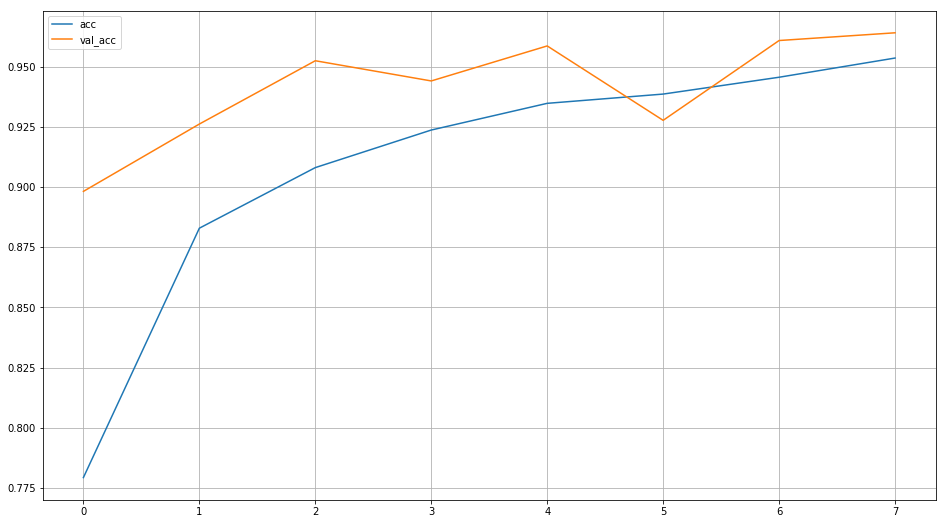

In [0]:
plt.figure(figsize=(16,9))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.grid()

cat!


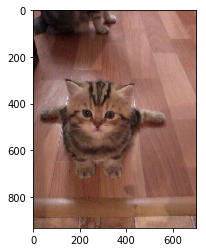

In [0]:
pic_name = '4pogat.jpg'
catdog_classifier = model
answer = catdog_classifier.predict_proba(load_image(pic_name))
plt.imshow(load_img(pic_name, [250,250]))
if answer[0] == 0:
    print('cat!')
else:
    print('dog!')

In [0]:
model.save('CatDog.h5')

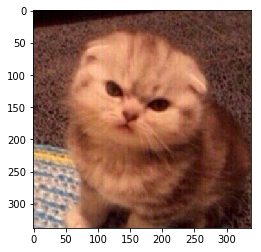

In [83]:
layers_outputs = []
for layer in selfmade_model.layers:
    if layer.name.find('conv') is not -1:
        layers_outputs.append(layer.output)
activation_model = k.models.Model(inputs=selfmade_model.input, outputs=layers_outputs)
img = load_image("happyn't.jpg", [200,200])
plt.imshow(load_img("happyn't.jpg"))

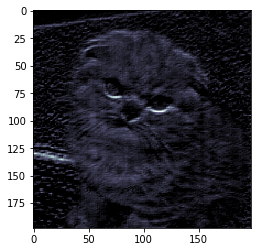

In [130]:
activations = activation_model.predict(np.array(img))
first_activations = activations[0]
plt.imshow(first_activations[0,:,:,30], cmap='bone')

In [119]:
conv_activations = activations
conv_names = []

for layer in selfmade_model.layers:
    if layer.name.find('conv') is not -1:
        conv_names.append(layer.name)
count = 0
for name in conv_names:
    print(name)
    print(conv_activations[count].shape)
    count += 1

conv2d_9
(1, 198, 198, 32)
conv2d_10
(1, 97, 97, 64)
conv2d_11
(1, 46, 46, 128)
conv2d_12
(1, 21, 21, 128)


In [0]:
def make_composition(activation, column_count=16 ):
    _, high,_,count = activation.shape
    pos = 0
    final_img = np.zeros([1,high*column_count + 1])
    for i in range(int(count/column_count)):
        row_img = np.zeros([1,high]).transpose()
        for j in range(column_count):
            row_img = np.hstack([row_img,activation[0, :, :, pos]])
            pos +=1
        final_img = np.vstack([final_img, row_img])
    return final_img

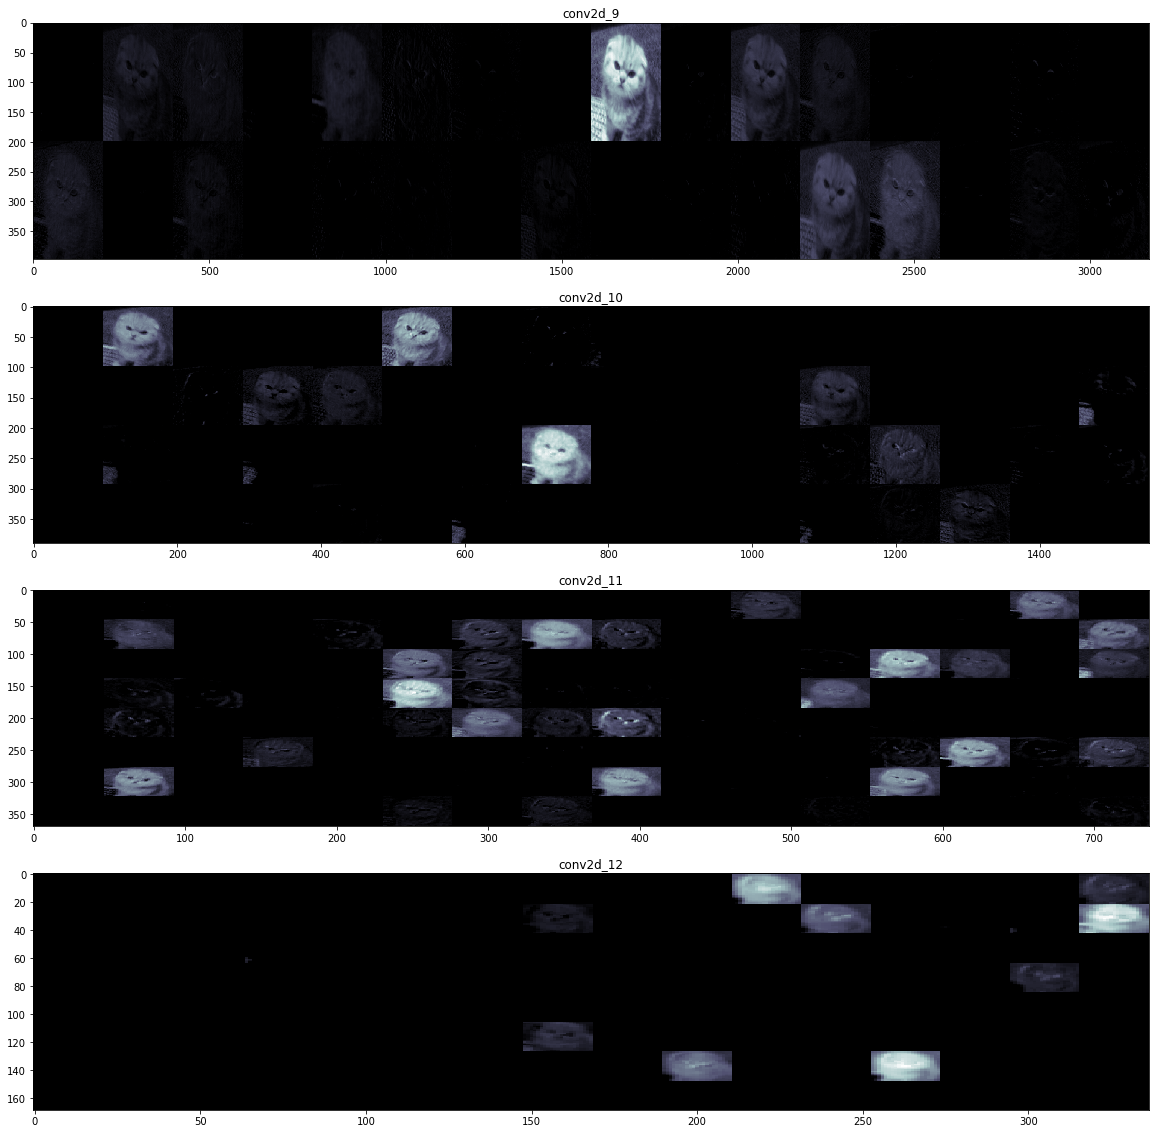

In [126]:
plt.figure(figsize = (20,20))
i = 0
for activation in activations:
    plt.subplot(4, 1, i+1)
    plt.title(conv_names[i])
    i += 1
    plt.imshow(make_composition(activation, column_count=16), cmap='bone', aspect='auto')